In [1]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Nodes and Edges: How do we represent relationships between individuals using NetworkX?

As mentioned earlier, networks, also known as graphs, are comprised of individual entities and their representatives. The technical term for these are nodes and edges, and when we draw them we typically use circles (nodes) and lines (edges). 

In this notebook, we will work with a synthetic (i.e. simulated) social network, in which nodes are individual people, and edges represent their relationships. If two nodes have an edge between them, then those two individauls know one another. 

## Data Representation

In the `networkx` implementation, graph objects store their data in dictionaries. 

Nodes are part of the attribute `Graph.node`, which is a dictionary where the key is the node ID and the values are a dictionary of attributes. 

Edges are part of the attribute `Graph.edge`, which is a nested dictionary. Data are accessed as such: `G.edge[node1][node2]['attr_name']`.

Because of the dictionary implementation of the graph, any hashable object can be a node. This means strings and tuples, but not lists and sets.

# Synthetic Social Network

With this synthetic social network, we will attempt to answer the following basic questions using the NetworkX API:

1. How many people are present in the network?
2. What is the distribution of attributes of the people in this network?
2. How many relationships are represented in the network?
3. What is the distribution of the number of friends that each person has?

First off, let's load up the synthetic social network. This will show you through some of the basics of NetworkX.

For those who are interested, I simply created an Erdõs-Rényi graph with `n=30` and `p=0.1`. I used randomized functions that I wrote to generate attributes and append them to each node and edge. I then pickled the graph to disk.

In [2]:
G = nx.read_gpickle('Synthetic Social Network.pkl')

# Basic Network Statistics
Let's first understand how many people and relationships are represented in the network.

In [19]:
# Who are represented in the net work?
G.nodes()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32]

### Exercise

Can you write a single line of code that returns the number of individuals represented?

In [4]:
len(G.nodes())

30

Let's now figure out who is connected to who in the network

In [5]:
# Who is connected to who in the network?
G.edges()

[(0, 10),
 (0, 19),
 (0, 12),
 (1, 4),
 (1, 2),
 (1, 3),
 (1, 12),
 (1, 29),
 (2, 16),
 (2, 3),
 (2, 6),
 (2, 19),
 (3, 8),
 (3, 6),
 (3, 23),
 (4, 19),
 (4, 28),
 (6, 23),
 (7, 24),
 (7, 25),
 (8, 17),
 (8, 22),
 (9, 24),
 (9, 17),
 (9, 11),
 (10, 11),
 (10, 21),
 (11, 14),
 (12, 19),
 (12, 29),
 (13, 16),
 (13, 24),
 (13, 14),
 (14, 17),
 (14, 25),
 (15, 24),
 (15, 28),
 (16, 17),
 (16, 19),
 (17, 19),
 (19, 22),
 (19, 27),
 (20, 27),
 (20, 23),
 (21, 27),
 (21, 26),
 (25, 28),
 (26, 29)]

### Exercise

Can you write a single line of code that returns the number of relationships represented?

In [6]:
len(G.edges())

48

## Concept

A **network**, more technically known as a **graph**, is comprised of:

- a set of nodes
- joined by a set of edges

They can be represented as two lists:

1. A **node list**: a list of 2-tuples where the first element of each tuple is the representation of the node, and the second element is a dictionary of metadata associated with the node.
2. An **edge list**: a list of 3-tuples where the first two elements are the nodes that are connected together, and the third element is a dictionary of metadata associated with the edge.

Since this is a social network of people, there'll be attributes for each individual, such as age, and sex. We can grab that data off from the attributes that are stored with each node.

In [7]:
# Let's get a list of nodes with their attributes.
G.nodes(data=True)

# NetworkX will return a list of tuples in the form (node_id, attribute_dictionary) 

[(0, {'age': 20, 'sex': 'Male'}),
 (1, {'age': 21, 'sex': 'Female'}),
 (2, {'age': 19, 'sex': 'Male'}),
 (3, {'age': 29, 'sex': 'Female'}),
 (4, {'age': 30, 'sex': 'Male'}),
 (5, {'age': 26, 'sex': 'Female'}),
 (6, {'age': 21, 'sex': 'Male'}),
 (7, {'age': 17, 'sex': 'Female'}),
 (8, {'age': 21, 'sex': 'Male'}),
 (9, {'age': 14, 'sex': 'Male'}),
 (10, {'age': 23, 'sex': 'Male'}),
 (11, {'age': 17, 'sex': 'Female'}),
 (12, {'age': 19, 'sex': 'Male'}),
 (13, {'age': 27, 'sex': 'Female'}),
 (14, {'age': 29, 'sex': 'Female'}),
 (15, {'age': 14, 'sex': 'Male'}),
 (16, {'age': 18, 'sex': 'Female'}),
 (17, {'age': 21, 'sex': 'Female'}),
 (18, {'age': 19, 'sex': 'Male'}),
 (19, {'age': 19, 'sex': 'Female'}),
 (20, {'age': 19, 'sex': 'Female'}),
 (21, {'age': 21, 'sex': 'Male'}),
 (22, {'age': 30, 'sex': 'Female'}),
 (23, {'age': 25, 'sex': 'Female'}),
 (24, {'age': 13, 'sex': 'Male'}),
 (25, {'age': 24, 'sex': 'Female'}),
 (26, {'age': 23, 'sex': 'Male'}),
 (27, {'age': 21, 'sex': 'Male'}),
 (

### Exercise

Can you count how many males and females are represented in the graph?

Hint: You may want to use the Counter object from the collections module.

In [21]:
from collections import Counter
Counter([d['sex'] for n, d in G.nodes(data=True)])

Counter({'Female': 16, 'Male': 16})

Edges can also store attributes in their attribute dictionary.

In [9]:
G.edges(data=True)

[(0, 10, {'date': datetime.datetime(2011, 6, 7, 0, 0)}),
 (0, 19, {'date': datetime.datetime(2011, 2, 12, 0, 0)}),
 (0, 12, {'date': datetime.datetime(2006, 8, 28, 0, 0)}),
 (1, 4, {'date': datetime.datetime(2009, 11, 8, 0, 0)}),
 (1, 2, {'date': datetime.datetime(2010, 8, 5, 0, 0)}),
 (1, 3, {'date': datetime.datetime(2005, 2, 3, 0, 0)}),
 (1, 12, {'date': datetime.datetime(2003, 3, 17, 0, 0)}),
 (1, 29, {'date': datetime.datetime(2005, 1, 15, 0, 0)}),
 (2, 16, {'date': datetime.datetime(2002, 5, 27, 0, 0)}),
 (2, 3, {'date': datetime.datetime(2009, 8, 13, 0, 0)}),
 (2, 6, {'date': datetime.datetime(2006, 1, 12, 0, 0)}),
 (2, 19, {'date': datetime.datetime(2010, 1, 6, 0, 0)}),
 (3, 8, {'date': datetime.datetime(2010, 6, 22, 0, 0)}),
 (3, 6, {'date': datetime.datetime(2009, 3, 20, 0, 0)}),
 (3, 23, {'date': datetime.datetime(2003, 11, 9, 0, 0)}),
 (4, 19, {'date': datetime.datetime(2007, 12, 4, 0, 0)}),
 (4, 28, {'date': datetime.datetime(2009, 5, 22, 0, 0)}),
 (6, 23, {'date': datetim

In this synthetic social network, I have stored the date as a datetime object. Datetime objects have attributes, namely `.year`, `.month`, `.day`.

### Exercise

Can you figure out the range of dates during which these relationships were forged? Specifically, compute the earliest and last date.

In [10]:
# Answer
dates = [d['date'] for _, _, d in G.edges(data=True)]
mindate = min(dates)
maxdate = max(dates)
print(mindate, maxdate)

2002-05-20 00:00:00 2011-11-04 00:00:00


### Exercise

We found out that there are two individuals that we left out of the network, individual no. 31 and 32. They are one male (31) and one female (32), their ages are 22 and 24 respectively, they knew each other on 2010-01-09, and together, they both knew individual 7, on 2009-12-11. Use the functions `G.add_node()` and `G.add_edge()` to introduce this data into the network.

If you need more help, check out https://networkx.github.io/documentation/latest/tutorial/tutorial.html

In [23]:
# Answer
G.add_node(31, age=22, sex='Male')
G.add_node(32, age=24, sex='Female')
G.add_edge(31, 32, date=datetime(2010,1,9))
G.add_edge(31, 7, date=datetime(2009,12,11))
G.add_edge(32, 7, date=datetime(2009,12,11))

G.edge[31]

{7: {'date': datetime.datetime(2009, 12, 11, 0, 0)},
 32: {'date': datetime.datetime(2010, 1, 9, 0, 0)}}

Verify that you have added in the edges and nodes correctly by running the following cell.

In [12]:
def test_graph_integrity(G):
    assert 31 in G.nodes()
    assert 32 in G.nodes()
    assert G.has_edge(31, 32)
    assert G.has_edge(31, 7)
    assert G.has_edge(32, 7)
    print('All tests passed.')
    
test_graph_integrity(G)

All tests passed.


## Tests

A note about the tests: Testing is good practice when writing code. Well-crafted assertion statements help you program defensivel, by forcing you to explicitly state your assumptions about the code. 

For more references on defensive programming, check out Software Carpentry's website: http://swcarpentry.github.io/python-novice-inflammation/08-defensive.html

For more information on writing tests for your data, check out these slides from a lightning talk I gave at Boston Python and SciPy 2015: http://j.mp/data-test

# Coding Patterns

These are some recommended coding patterns when doing network analysis using NetworkX, which stem from my roughly two years of experience with the package.

## Iterating using List Comprehensions
I would recommend that you use the following for compactness: 

    [d['attr'] for n, d in G.nodes(data=True)]

And if the node is unimportant, you can do:

    [d['attr'] for _, d in G.nodes(data=True)]

## Iterating over Edges using List Comprehensions

A similar pattern can be used for edges:

    [n2 for n1, n2, d in G.edges(data=True)]

or

    [n2 for _, n2, d in G.edges(data=True)]

If the graph you are constructing is a directed graph, with a "source" and "sink" available, then I would recommend the following pattern:

    [(sc, sk) for sc, sk, d in G.edges(data=True)]

or 

    [d['attr'] for sc, sk, d in G.edges(data=True)]

# Drawing Graphs

As illustrated above, we can draw graphs using the `nx.draw()` function. The most popular format for drawing graphs is the **node-link diagram**.

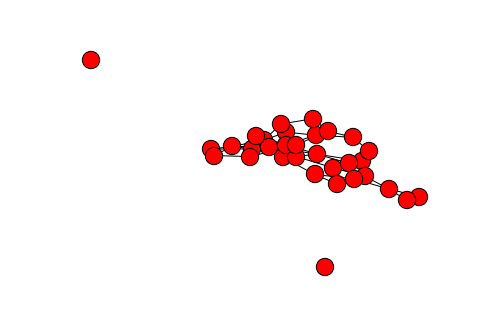

In [13]:
nx.draw(G)

If the network is small enough to visualize, and the node labels are small enough to fit in a circle, then you can use the `with_labels=True` argument.

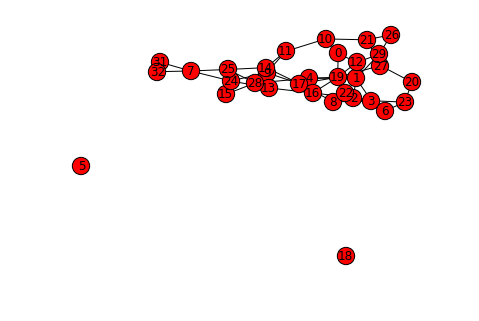

In [14]:
nx.draw(G, with_labels=True)

However, note that if the number of nodes in the graph gets really large, node-link diagrams can begin to look like massive hairballs. This is undesirable for graph visualization.

Instead, we can use a **matrix** to represent them. The nodes are on the x- and y- axes, and a filled square represent an edge between the nodes. This is done by using the `nx.to_numpy_matrix(G)` function.

We then use `matplotlib`'s `pcolor(numpy_array)` function to plot. Because `pcolor` cannot take in numpy matrices, we will cast the matrix as an array of arrays, and then get `pcolor` to plot it.

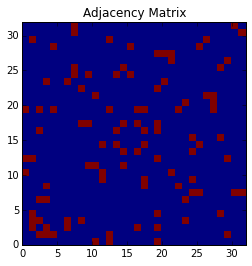

In [15]:
matrix = nx.to_numpy_matrix(G)

plt.pcolor(np.array(matrix))
plt.axes().set_aspect('equal') # set aspect ratio equal to get a square visualization
plt.xlim(min(G.nodes()), max(G.nodes())) # set x and y limits to the number of nodes present.
plt.ylim(min(G.nodes()), max(G.nodes()))
plt.title('Adjacency Matrix')
plt.show()

Let's try another visualization, the **Circos plot**. We can order the nodes in the Circos plot according to the node ID, but any other ordering is possible as well. Edges are drawn between two nodes.

Credit goes to Justin Zabilansky (MIT) for the implementation, and Jon Charest for improvements.

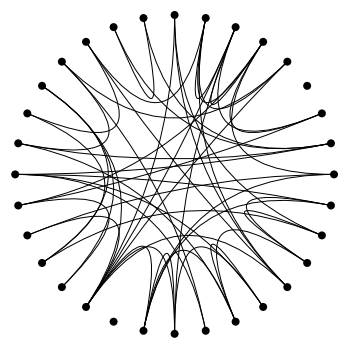

In [16]:
from circos import CircosPlot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

nodes = sorted(G.nodes())
edges = G.edges()

c = CircosPlot(nodes, edges, radius=10, ax=ax)
c.draw()

It's pretty obvious in this visualization that there are nodes, such as node 5 and 18, that are not connected to any other node via an edge. There are other nodes, like node number 19, which is highly connected to other nodes.

Finally, let's try **hive plots** for the network. Two groups (male and female), and then edges drawn between them.

In [17]:
from hiveplot import HivePlot

nodes = dict()
nodes['male'] = [n for n,d in G.nodes(data=True) if d['sex'] == 'Male']
nodes['female'] = [n for n,d in G.nodes(data=True) if d['sex'] == 'Female']

edges = dict()
edges['group1'] = G.edges(data=True)

nodes_cmap = dict()
nodes_cmap['male'] = 'blue'
nodes_cmap['female'] = 'red'

edges_cmap = dict()
edges_cmap['group1'] = 'black'

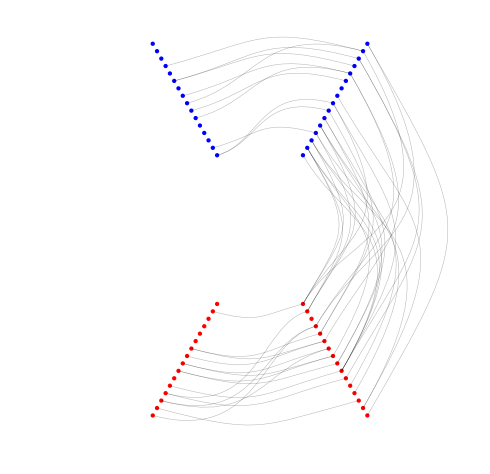

In [18]:
h = HivePlot(nodes, edges, nodes_cmap, edges_cmap)
h.draw()